# The Data Open Championship by Citadel

Notebook by Timothy Delille, Philippe Ferreira De Sousa, Michaël Karpe, Abdollah Rida.

## Import librairies

We used the Plotly library (https://plot.ly/) which produces elegant visualizations such as the maps in the report. However, Plotly visualization *may not* display neither in HTML format. Please refer to the report for the corresponding visualizations if they do not appear in the Notebook.

In [1]:
from datetime import datetime, date, timedelta
from tqdm import tqdm

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly_express as px
import requests
import seaborn as sns

## Load data

In [2]:
PATH_TO_FOLDER = os.getcwd()

EMPLOYMENT = pd.read_csv(PATH_TO_FOLDER + '/data' + '/employment_by_occupation.csv')
LABOR = pd.read_csv(PATH_TO_FOLDER + '/data' + '/labor_market_statistics.csv')
IMMIGRANT = pd.read_csv(PATH_TO_FOLDER + '/data' + '/immigrant_statistics.csv', thousands=',')
LSE_historical_data = pd.read_csv(PATH_TO_FOLDER + '/data' + '/lse_historical_data.csv')
LEGISLATION = pd.read_csv(PATH_TO_FOLDER + '/data' + '/uk_bill_data.csv')
JOB_LISTINGS = pd.read_csv(
    PATH_TO_FOLDER + '/data' + '/job_listings.csv',
    parse_dates=['created', 'last_checked', 'last_updated', 'delete_date', 'ticker_end_date', 'ticker_start_date']
)

IMMIGRANT_LEGEND = pd.read_csv(PATH_TO_FOLDER + '/legends' + '/immigrant_legend.csv')
LABOR_LEGEND = pd.read_csv(PATH_TO_FOLDER + '/legends' + '/labor_market_stats_legend.csv')
ONET_LEGEND = pd.read_csv(PATH_TO_FOLDER + '/legends' + '/onet_code_legend.csv')
SOC_LEGEND = pd.read_csv(PATH_TO_FOLDER + '/legends' + '/soc_code_legend.csv')

## 1. Labor Market

We focused our study on the Labor Force Survey data (CDIC whose title in `LABOR_LEGEND` contains "LFS"). There has been a huge work to clean the data and generate automatic processes on it, however we decided to focus our study on other databases who are easier to study in a limited time and provide more insightful answers to our question.

### Labor table

In [3]:
LABOR.sample(5)

Year Month     YBZY     YBZR     YBZQ     YBZT     YBZS     YBZV  \
214  2013   FEB   4358.0   7273.0   1967.0   3329.0   3945.0   5967.0   
35   2002   OCT   3774.0   6813.0   1781.0   3075.0   3738.0   5826.0   
20   2001   DEC   3685.0   6948.0   1770.0   3121.0   3827.0   5711.0   
212  2012  YEAR  51816.0  86424.0  23376.0  39564.0  46848.0  72360.0   
105  2006   DEC   4001.0   6696.0   1919.0   3039.0   3657.0   6123.0   

         YBZU     YBZW  ...   LF3M   AIYW   LF3T   LF45    YCGN   AIYX  DZ36  \
214   11330.0   5363.0  ...   75.8    9.0   69.5   65.0   305.0   10.3   NaN   
35    10888.0   5063.0  ...   72.3    7.1   72.3   65.0   187.0    8.3   NaN   
20    10685.0   4973.0  ...   70.5    6.8   72.1   64.7   217.0    7.5   NaN   
212  136860.0  64512.0  ...  902.4  105.6  834.0  786.0  3432.0  121.2   NaN   
105   11455.0   5331.0  ...   74.5    9.2   71.0   65.7   195.0   10.6   NaN   

      LF3S   LF44    YCGM  
214   70.9   61.9   538.0  
35    74.4   61.5   324.0  
20    74.1   61.9   364.0  
212  856.8  751.2  6564.0  
105   74.4   64.8   358.0  

[5 rows x 255 columns]

In [4]:
LABOR_YEARLY = LABOR[LABOR['Month'] == 'YEAR'].drop(columns=['Month'])
LABOR_YEARLY = LABOR_YEARLY.transpose().reset_index()

LABOR_YEARLY.columns = ['CDID'] + [
    int(list(LABOR_YEARLY.iloc[0, 1:])[i])
    for i in range(len(list(LABOR_YEARLY.iloc[0, 1:])))
]
LABOR_YEARLY = LABOR_YEARLY.drop([0]).reset_index(drop=True)
LABOR_YEARLY = LABOR_YEARLY.melt(id_vars=['CDID'], var_name="Year", value_name="Value")

### Labor legend

In [5]:
LABOR_LEGEND.sample(5)

Title  CDID   Unit  \
134    LFS: Employees: Part-time: UK: Female: 000s: SA  YCBP  000's   
172  LFS: Part-time workers: Did not want full-time...  YCDE  000's   
110  LFS: Temporary employees: Contract with period...  YCCP  000's   
162  LFS: Employment rate: Aged 16-24: Not in full-...  AIWX      %   
227  LFS: Econ. inactivity rate: Aged 18-24: In ful...  AIZC      %   

     Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
134         NaN         NaN         NaN         NaN         NaN         NaN   
172         NaN         NaN         NaN         NaN         NaN         NaN   
110         NaN         NaN         NaN         NaN         NaN         NaN   
162         NaN         NaN         NaN         NaN         NaN         NaN   
227         NaN         NaN         NaN         NaN         NaN         NaN   

     Unnamed: 9  ...  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  \
134         NaN  ...          NaN          NaN          NaN          NaN   
172         NaN  ...          NaN          NaN          NaN          NaN   
110         NaN  ...          NaN          NaN          NaN          NaN   
162         NaN  ...          NaN          NaN          NaN          NaN   
227         NaN  ...          NaN          NaN          NaN          NaN   

     Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  \
134          NaN          NaN          NaN          NaN          NaN   
172          NaN          NaN          NaN          NaN          NaN   
110          NaN          NaN          NaN          NaN          NaN   
162          NaN          NaN          NaN          NaN          NaN   
227          NaN          NaN          NaN          NaN          NaN   

     Unnamed: 21  
134          NaN  
172          NaN  
110          NaN  
162          NaN  
227          NaN  

[5 rows x 22 columns]

In [6]:
LABOR_LEGEND = LABOR_LEGEND[LABOR_LEGEND['Title'].str[:3] == 'LFS'][['Title', 'CDID', 'Unit']].reset_index(drop=True)

titles_data = pd.DataFrame([x.split(': ') for x in LABOR_LEGEND['Title'].tolist()])

status_to_df = {
    status: titles_data[titles_data[1] == status].drop(columns=[0, 7])
    for status in set(titles_data[1])
}

status_to_headers = {
    'Workers with second jobs': ['Status', 'Location', 'Sex', 'Unit'],
    'Self-employed': ['Status', 'Type', 'Location', 'Sex', 'Unit'],
    'Economic activity rate': ['Status', 'Location', 'Sex', 'Age', 'Unit'],
    'Econ. inactive': ['Status', 'Age', 'Type', 'Location', 'Sex', 'Unit'],
    'Part-time workers': ['Status', 'Type', 'Location', 'Sex', 'Unit'],
    'Economic inactivity rate': ['Status', 'Age', 'Location', 'Sex', 'Unit'],
    'Employees': ['Status', 'Type', 'Location', 'Sex', 'Unit'],
    'Unemployment rate': ['Status', 'Age', 'Type', 'Location', 'Sex', 'Unit'],
    'ILO unemployed up to 6 months': ['Status', 'Location', 'Sex', 'Age', 'Unit'],
    'Unemployed': ['Status', 'Age', 'Type', 'Location', 'Sex', 'Unit'],
    'In Employment': ['Status', 'Location', 'Sex', 'Age', 'Unit'],
    'In employment': ['Status', 'Age', 'Type', 'Location', 'Sex', 'Unit'],
    'Economically inactive': ['Status', 'Location', 'Sex', 'Age', 'Unit'],
    'Employment rate': ['Status', 'Age', 'Type', 'Location', 'Sex', 'Unit'],
    'Econ. inact. rate': ['Status', 'Age', 'Type', 'Location', 'Sex', 'Unit'],
    'ILO unemployed over 24 months': ['Status', 'Location', 'Sex', 'Age', 'Unit'],
    'ILO unemployed': ['Status', 'Age', 'Location', 'Sex', 'Unit'],
    'ILO unemployment rate': ['Status', 'Age', 'Location', 'Sex', 'Unit'],
    'Econ. inactivity rate': ['Status', 'Age', 'Type', 'Location', 'Sex', 'Unit'],
    'Temporary employees': ['Status', 'Type', 'Location', 'Sex', 'Unit'],
    'Temporary employees as a % of all employees': ['Status', 'Location', 'Sex', 'Unit'],
    'Economically active': ['Status', 'Location', 'Sex', 'Age', 'Unit']   
}

status_to_headers = {
    key: value + [i for i in range(len(status_to_df[key].columns) - len(value))]
    for key, value in status_to_headers.items()
}

for key, value in status_to_df.items():
    value.columns = status_to_headers[key]
    status_to_df[key] = value.drop(
        columns=[col for col in value.columns if isinstance(col, int)]
    ).drop(
        [row for row in value.index.tolist() if not value['Unit'][row] in ['%', '000s', '000\'s']]
    )
    
for key, value in status_to_df.items():
    status_to_df[key] = value.drop(
        [row for row in value.index.tolist() if value['Location'][row] != 'UK']
    )

for key, value in status_to_df.items():
    status_to_df[key] = value.drop(
        [row for row in value.index.tolist() if 'Age' in value.columns and 'Aged' not in value['Age'][row]]
    )

LABOR_LEGEND_CLEANED = pd.concat([df for df in status_to_df.values()], axis=0).drop(columns=['Location']).sort_index()

LABOR_LEGEND_CLEANED = LABOR_LEGEND_CLEANED.merge(
    LABOR_LEGEND[['Title', 'CDID']],
    how='inner', left_index=True, right_index=True
)

LABOR_LEGEND_CLEANED.sample(5)

/home/michael/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:58: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




Age     Sex                    Status                    Type  \
207  Aged 16-17    Male     Econ. inactivity rate      In full-time educ.   
163  Aged 16-24     All  Economic inactivity rate                     NaN   
202  Aged 50-64  Female       Economically active                     NaN   
14   Aged 16-17    Male             In employment  In full-time education   
38   Aged 16-17     All                Unemployed  In full-time education   

     Unit                                              Title  CDID  
207     %  LFS: Econ. inactivity rate: Aged 16-17: In ful...  AIZE  
163     %  LFS: Economic inactivity rate: Aged 16-24: UK:...  AIYL  
202  000s  LFS: Economically active: UK: Female: Aged 50-...  LF3B  
14   000s  LFS: In employment: Aged 16-17: In full-time e...  AGNU  
38   000s  LFS: Unemployed: Aged 16-17: In full-time educ...  AGOS

### Merge and study

In [7]:
LABOR_YEARLY = LABOR_YEARLY.merge(
    LABOR_LEGEND_CLEANED, how='inner', on='CDID'
)

LABOR_YEARLY = LABOR_YEARLY[LABOR_YEARLY['Status'].isin(['Economically active', 'Economically inactive'])]
# LABOR_YEARLY = LABOR_YEARLY[LABOR_YEARLY['Age'].isin(['Aged 18-24', 'Aged 25-34', 'Aged 35-49', 'Aged 50-64'])]  # .apply(lambda x: '16' not in x if isinstance(x, str) else False)]
LABOR_YEARLY = LABOR_YEARLY[LABOR_YEARLY['Unit'] == '000s']
LABOR_YEARLY = LABOR_YEARLY[LABOR_YEARLY['Sex'] == 'All']

LABOR_YEARLY.sample(5)

CDID  Year    Value         Age  Sex                 Status Type  Unit  \
2547  YCBB  2001  22896.0  Aged 35-49  All  Economically inactive  NaN  000s   
1131  YCAS  2016  11640.0  Aged 16-17  All  Economically inactive  NaN  000s   
2562  YCBB  2016  20748.0  Aged 35-49  All  Economically inactive  NaN  000s   
2551  YCBB  2005  23832.0  Aged 35-49  All  Economically inactive  NaN  000s   
42    YBZR  2007  80628.0  Aged 25-34  All    Economically active  NaN  000s   

                                                  Title  
2547  LFS: Economically inactive: UK: All: Aged 35-4...  
1131  LFS: Economically inactive: UK: All: Aged 16-1...  
2562  LFS: Economically inactive: UK: All: Aged 35-4...  
2551  LFS: Economically inactive: UK: All: Aged 35-4...  
42    LFS: Economically active: UK: All: Aged 25-34:...

Here we can see that due to missing or data not in the good format, the "Economically active" and "Economically inactive" status do not have the information for the 4 categories of ages selected before ("Ages 18-24" is missing for "Active" and "Ages 50-64" for "Inactive"). It took too much time to clean it properly, therefore we display the graphs and stop our study here for this database.

In [8]:
set(LABOR_YEARLY['Status'] + LABOR_YEARLY['Age'])

{'Economically activeAged 25-34',
 'Economically activeAged 35-49',
 'Economically activeAged 50-64',
 'Economically inactiveAged 16-17',
 'Economically inactiveAged 18-24',
 'Economically inactiveAged 25-34',
 'Economically inactiveAged 35-49'}

In [9]:
LABOR_YEARLY['CDID_2'] = LABOR_YEARLY['CDID']
LABOR_YEARLY['CDID'] = LABOR_YEARLY['Status'] + LABOR_YEARLY['Age'].apply(lambda x: " " + x[5:])

In [10]:
gapminder = LABOR_YEARLY
fig = px.line(gapminder, x="Year", y="Value", color='CDID', title='Number of people economically active or inactive given their age')
fig.update_layout(yaxis_type="log")
fig.show()

## 2. Immigrant applications

### Database preprocessing

In [11]:
IMMIGRANT = IMMIGRANT.groupby(['Year']).apply(sum)
IMMIGRANT = IMMIGRANT.transpose().reset_index()

IMMIGRANT.columns = ['Code'] + [
    IMMIGRANT.columns.tolist()[1:][i]
    for i in range(len(list(IMMIGRANT.iloc[0, 1:])))
]
IMMIGRANT = IMMIGRANT.drop([0, 1]).reset_index(drop=True)
IMMIGRANT = IMMIGRANT.melt(id_vars=['Code'], var_name="Date", value_name="Value")

IMMIGRANT = IMMIGRANT[IMMIGRANT['Date'] != 2018]

IMMIGRANT_LEGEND = IMMIGRANT_LEGEND.merge(
    IMMIGRANT, on=["Code"], how='inner'
)

IMMIGRANT_LEGEND['Code'] = IMMIGRANT_LEGEND['Code'].apply(lambda x: x.split('-')[-1])

gapminder = px.data.gapminder()[['country', 'iso_alpha']]
gapminder['country'] = gapminder['country'].replace({
    'Burkina Faso': 'Burkina',
    'Congo, Dem. Rep.': 'Congo (Democratic Republic)',
    'Congo, Rep.': 'Congo',
    "Cote d'Ivoire": 'Ivory Coast',
    'Gambia': 'Gambia, The',
    'Hong Kong, China': 'Hong Kong',
    'Korea, Dem. Rep.': 'Korea (South)',
    'Myanmar': 'Burma',
    'Slovak Republic': 'Slovakia',
    'Yemen, Rep.': 'Yemen'
})

IMMIGRANT_LEGEND = IMMIGRANT_LEGEND.merge(
    gapminder, left_on=['Country of nationality'], right_on=['country'], how='left'
)

IMMIGRANT_LEGEND['iso_alpha'] = IMMIGRANT_LEGEND['iso_alpha'].fillna(IMMIGRANT_LEGEND['Code'])

IMMIGRANT_LEGEND = IMMIGRANT_LEGEND[
    IMMIGRANT_LEGEND['Country of nationality'].apply(lambda x: 'Total' not in x)
].drop_duplicates().reset_index(drop=True)

### Display maps

In [12]:
fig = px.choropleth(
    IMMIGRANT_LEGEND, locations="iso_alpha", color="Value", hover_name="country", animation_frame="Date",
    range_color=[0, 5e3]
)

for geo_scope in ['World', 'Europe', 'Asia', 'Africa', 'North America', 'South America']:
    fig.update_layout(
        title_text = 'Map of country-level statistics on citizenship applications to the UK in {}'.format(geo_scope),
        geo_scope=geo_scope.lower()
    )
    fig.show()

### Display graphs

In [13]:
IMMIGRANT_LEGEND = IMMIGRANT_LEGEND[
    IMMIGRANT_LEGEND['Value'].apply(lambda x: isinstance(x, int))
].sort_values(['Date', 'Value'], ascending=False)

IMMIGRANT_LEGEND['Value'] = IMMIGRANT_LEGEND.groupby(['Geographical region', 'Date'])['Value'].transform(sum)

IMMIGRANT_LEGEND = IMMIGRANT_LEGEND.drop_duplicates(['Geographical region', 'Date']).sort_values(['Date', 'Value'], ascending=False)

In [14]:
fig = px.line(
    IMMIGRANT_LEGEND[IMMIGRANT_LEGEND['Geographical region'].apply(lambda x: 'EU' in x or 'Europe' in x)],
    x="Date", y="Value", color='Geographical region', title='Number of applications in EU regions')
fig.show()

In [15]:
fig = px.line(
    IMMIGRANT_LEGEND[~IMMIGRANT_LEGEND['Geographical region'].apply(lambda x: 'EU' in x or 'Europe' in x)],
    x="Date", y="Value", color='Geographical region', title='Number of applications in other regions')
fig.show()

### Some histograms

In [16]:
df_imm = pd.read_csv('data/immigrant_statistics.csv', thousands=",")
df_imm.head()

Year Quarter   AFN    AFS  AFN.1   ACS   ACE   AEA    ASO   ASE  ...  \
0  2007      Q1  1396  20485   1391  3337  4625  1747  13305  6026  ...   
1  2007      Q2   714   8163    864  1598  2041   879   7054  2171  ...   
2  2007      Q3   739   8648    774  1800  1845   847   6838  2142  ...   
3  2007      Q4   745   9087    672  1680  1824   945   6096  1778  ...   
4  2008      Q1  1019  13398    804  2293  1874   978   8536  2079  ...   

   ERO-VTC  ACS-VNZ  ASE-VTN  OTH-VIB  AMN-VIU  OCE-WAF  AFN-WSH  MIE-YMN  \
0        0       54      101        0        0        0        0      102   
1        0       36       76        0        0        0        0       76   
2        0       33       68        0        0        0        0       69   
3        0       21       81        0        0        0        0       74   
4        0       36       72        0        0        0        1      115   

   AFS-ZMB  AFS-ZBW  
0      248     2296  
1      102      891  
2      108     1183  
3      111     1507  
4      151     2230  

[5 rows x 265 columns]

In [17]:
col = list(df_imm.columns.values)
col = col[:18]

df_imm_g = df_imm[col].groupby('Year').sum()

df_imm_g

AFN    AFS  AFN.1   ACS    ACE    AEA    ASO    ASE    EU1   EU2  \
Year                                                                      
2007  3594  46383   3701  8415  10335   4418  33293  12117   2835  1545   
2008  3535  44916   3523  8303   5558   5019  38150   9938   2466  1488   
2009  4411  48090   4059  8008   4861   8318  63158  14495   2783  2923   
2010  4942  47631   4066  8182   5634  10680  66949  13542   3014  2928   
2011  5540  49357   4152  8245   5205  10364  67358  13657   3219  1732   
2012  4697  45703   4398  7779   4368   8154  58683  11405   4132  1354   
2013  4535  48100   5023  8844   4030   9751  86603  17897   5323  5745   
2014  2750  33017   4861  6369   1693   4599  39826   5174   3585  2552   
2015  2882  36557   4800  6174   2323   4572  51485   7154   5868  3554   
2016  2720  31781   4708  5323   2145   3612  44360   5978   6899  2677   
2017  2879  28200   4289  5015   2102   3330  37054   5105  18884  6018   
2018  2562  22564   3336  6756   1506   2543  25686   3854  16282  5496   

        EU8  EUO    ERO    MIE   OCE   OTH  
Year                                        
2007   1140  402  11564  11078  3957  2280  
2008    647  270  12608  14448  3557  1590  
2009   1075  287  14442  10656  4021  2223  
2010   2757  289  11919  10649  4110  2475  
2011   3629  263  12043  16544  4304  2185  
2012   4647  305  10725   9150  4108  1802  
2013  10234  374  11211   7768  5135  1689  
2014   5236  198   5990   5822  4460  1127  
2015   7675  249   6911   5449  3956  1158  
2016   5690  219   5387   4673  3625  1198  
2017  13342  422   5238   4796  3027  2093  
2018  10570  387   4109   4466  2357  2390

AFS


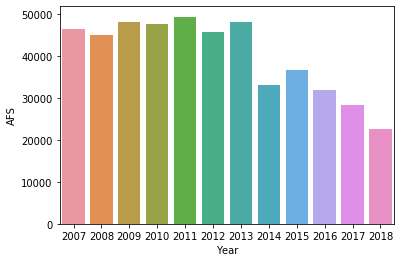

AFN.1


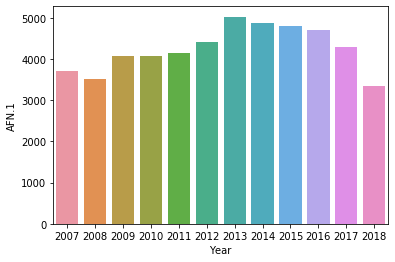

ACS


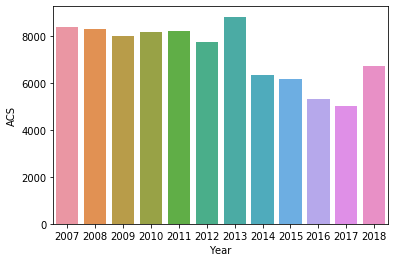

ACE


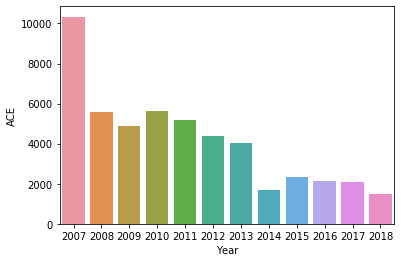

AEA


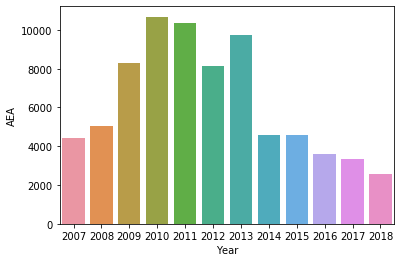

ASO


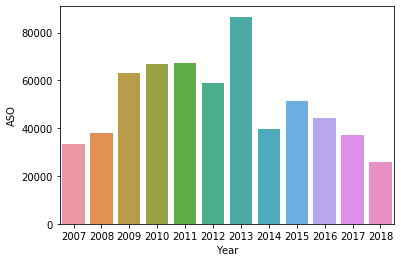

ASE


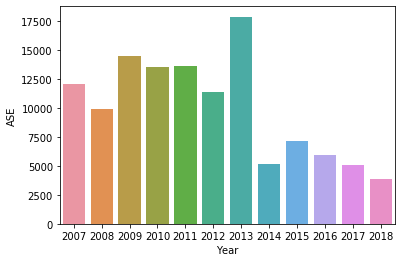

EU1


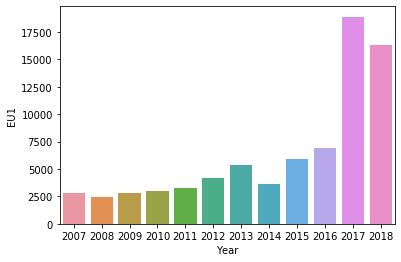

EU2


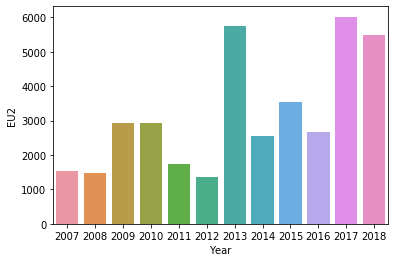

EU8


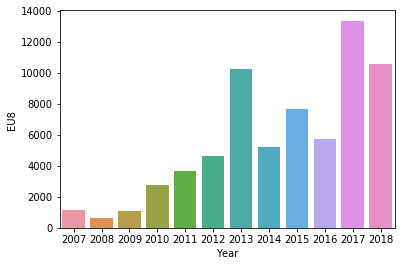

EUO


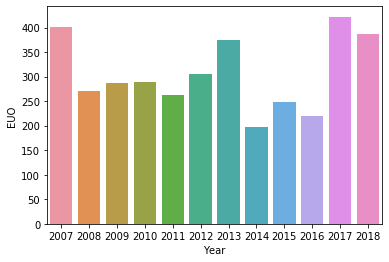

ERO


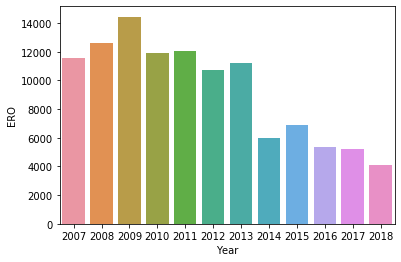

MIE


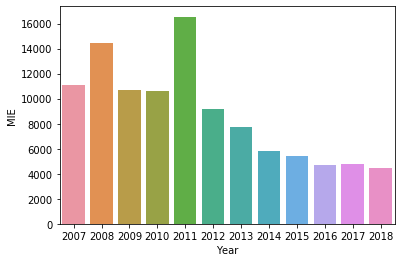

OCE


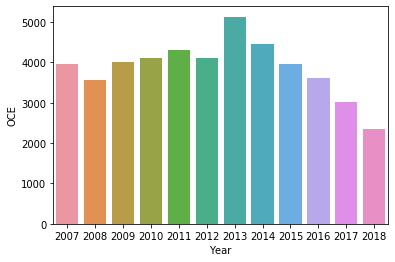

OTH


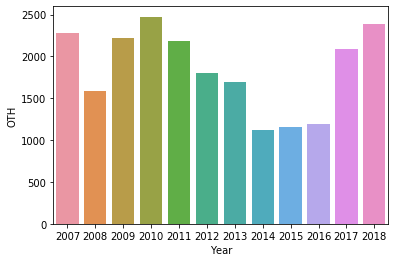

<Figure size 432x288 with 0 Axes>

In [18]:
for i in col[3:]:
    print(i)
    ax = sns.barplot(x=df_imm_g.index, y=df_imm_g[i], data=df_imm_g)
    plt.show()
    plt.clf()

## 4. London Stock Exchange

In [19]:
LSE_historical_data.head(5)

year  month ticker list_date                 company_name  \
0  2017     11    OPM    8/2/06                      1PM PLC   
1  2017     11    C21   4/15/05  21ST CENTURY TECHNOLOGY PLC   
2  2017     11    III   7/18/94                 3I GROUP PLC   
3  2017     11   NEXS   3/13/07        3I INFRASTRUCTURE PLC   
4  2017     11   DDDD   2/18/14                4D PHARMA PLC   

                  icb_industry ice_supersector country_of_incorporation  \
0           Financial Services      Financials           United Kingdom   
1  Industrial Goods & Services     Industrials           United Kingdom   
2           Financial Services      Financials           United Kingdom   
3           Financial Services      Financials                   Jersey   
4                   Healthcare     Health Care           United Kingdom   

    market_cap   eps          p/e          p/s  
0    40.036935  0.03  15.51819186  0.162790698  
1     2.564093     -            -            -  
2  8765.510388     -            -            -  
3  2025.382649     -            -            -  
4   221.041717     -            -            -

In [20]:
LSE_dated = LSE_historical_data.drop(['year','month'], axis=1)
LSE_dated['date'] = LSE_historical_data['year'].astype(str)+'-'+LSE_historical_data['month'].astype(str)
LSE_dated['date'] = pd.to_datetime(LSE_dated['date'])
#LSE_dated.set_index('date', inplace=True)
LSE_dated['market_cap'] = pd.to_numeric(LSE_dated['market_cap'], errors='coerce')
LSE_dated['eps'] = pd.to_numeric(LSE_dated['eps'], errors='coerce')
LSE_dated['p/e'] = pd.to_numeric(LSE_dated['p/e'], errors='coerce')
LSE_dated['p/s'] = pd.to_numeric(LSE_dated['p/s'], errors='coerce')
LSE_dated.head(5)

ticker list_date                 company_name                 icb_industry  \
0    OPM    8/2/06                      1PM PLC           Financial Services   
1    C21   4/15/05  21ST CENTURY TECHNOLOGY PLC  Industrial Goods & Services   
2    III   7/18/94                 3I GROUP PLC           Financial Services   
3   NEXS   3/13/07        3I INFRASTRUCTURE PLC           Financial Services   
4   DDDD   2/18/14                4D PHARMA PLC                   Healthcare   

  ice_supersector country_of_incorporation   market_cap   eps        p/e  \
0      Financials           United Kingdom    40.036935  0.03  15.518192   
1     Industrials           United Kingdom     2.564093   NaN        NaN   
2      Financials           United Kingdom  8765.510388   NaN        NaN   
3      Financials                   Jersey  2025.382649   NaN        NaN   
4     Health Care           United Kingdom   221.041717   NaN        NaN   

        p/s       date  
0  0.162791 2017-11-01  
1       NaN 2017-11-01  
2       NaN 2017-11-01  
3       NaN 2017-11-01  
4       NaN 2017-11-01

In [21]:
LSE_dated_dropna = LSE_dated.dropna(subset=['market_cap','eps','p/e','p/s'])
LSE_dated_dropna.head()

ticker list_date                  company_name        icb_industry  \
0      OPM    8/2/06                       1PM PLC  Financial Services   
21     ACC   6/28/05       ACCESS INTELLIGENCE PLC          Technology   
61     ATT   12/4/95  ALLIANZ TECHNOLOGY TRUST PLC  Financial Services   
77     AMO    6/9/04        AMINO TECHNOLOGIES PLC          Technology   
128   BOOM  12/12/05           AUDIOBOOM GROUP PLC               Media   

       ice_supersector country_of_incorporation  market_cap   eps        p/e  \
0           Financials           United Kingdom   40.036935  0.03  15.518192   
21          Technology           United Kingdom   12.760308 -0.05  -7.975193   
61          Financials           United Kingdom  319.133124  1.27   9.306886   
77          Technology           United Kingdom  137.250417  0.10  18.801427   
128  Consumer Services                   Jersey   35.364694 -0.24 -15.827378   

          p/s       date  
0    0.162791 2017-11-01  
21   0.129062 2017-11-01  
61   1.296296 2017-11-01  
77   0.630137 2017-11-01  
128  0.387755 2017-11-01

In [22]:
ticker_LSE = LSE_dated.dropna(subset=['market_cap']).groupby('ticker').agg(np.mean)
ticker_LSE.head()

market_cap     eps        p/e        p/s
ticker                                          
0JT5      0.000000  5.7500   0.000000  36.787500
AA      820.494951     NaN        NaN        NaN
AA4     634.372019  0.0600  29.435360   0.222528
AAA       6.607761  0.0025   3.497142   0.000000
AAAP      1.477280  0.0000        NaN   0.004113

### Companies Simple Random Sample 
(1% of the whole dataset)

In [23]:
symbols_sample = np.load('symbols_sample.npy')

In [24]:
np.save('symbols_sample', symbols_sample)
symbols_sample

array(['BRBY', 'AHT', 'SFOR', 'APAX', 'BSD', 'TGL', 'CLON', 'ADM', 'PSON',
       'SGEM', 'TXP', 'BOIL', 'IDP', 'OBC', 'WPCT'], dtype='<U4')

### Querying the corresponding stocks on World Trading Data

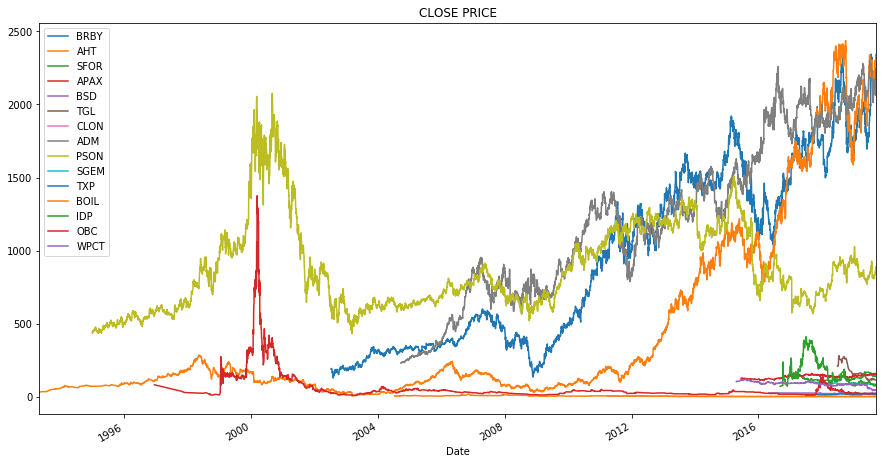

In [25]:
stocks = {'BRBY':[],'AHT':[],'ADM':[],'PSON':[],'SFOR':[],'APAX':[],'BSD':[],'TGL':[],'CLON':[],'SGEM':[],'TXP':[],'BOIL':[],'IDP':[],'OBC':[],'WPCT':[]}
for symbol in symbols_sample:
    df = pd.read_csv('stock/'+symbol+'.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['Close'].plot(figsize=(15,8), title='CLOSE PRICE', label=symbol)
    stocks[symbol] = df
plt.legend();

### Companies stock before 2016-06-23 (Referendum) and after 2010-01-01

In [26]:
limit_date = '2016-06-23'
start_date = '2010-01-01'

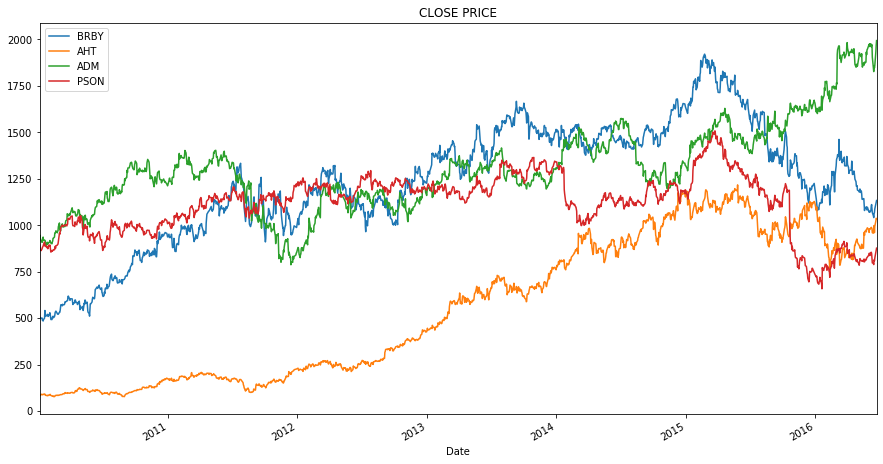

In [27]:
for symbol in ['BRBY','AHT','ADM','PSON',]:
    df = stocks[symbol]
    df[(df.index > start_date) & (df.index < limit_date)]['Close'].plot(figsize=(15,8), title='CLOSE PRICE', label=symbol)
plt.legend();

### We focus on the BRBY

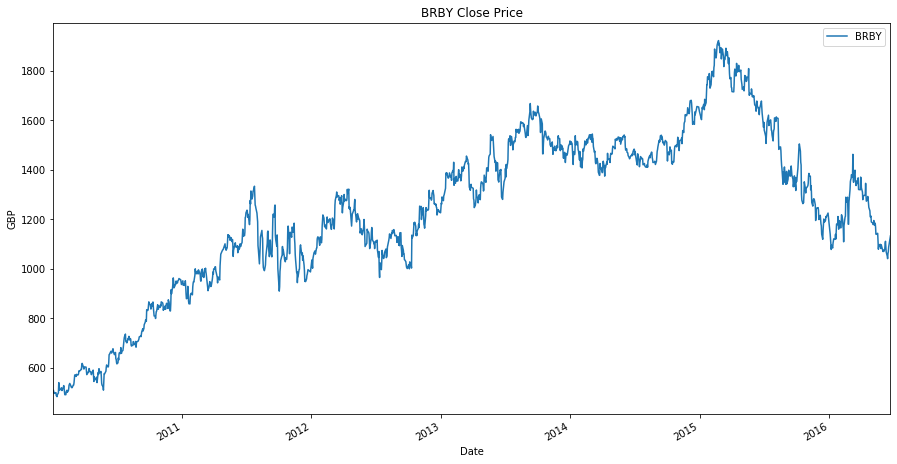

In [28]:
stocks['BRBY'][(stocks['BRBY'].index > start_date) & (stocks['BRBY'].index < limit_date)]['Close'].plot(figsize=(15,8), title='BRBY Close Price', label='BRBY')
plt.xlabel('Date')
plt.ylabel('GBP')
plt.legend()

In [29]:
print('BRBY')
stocks['BRBY'].describe()['Close']

BRBY


count    4345.000000
mean      948.282711
std       607.387251
min       127.080000
25%       354.790000
50%       948.330000
75%      1482.000000
max      2345.000000
Name: Close, dtype: float64

### Compute the log returns

In [30]:
def log_returns(df):
    return_ = np.log(df['Close'])
    return return_.diff()

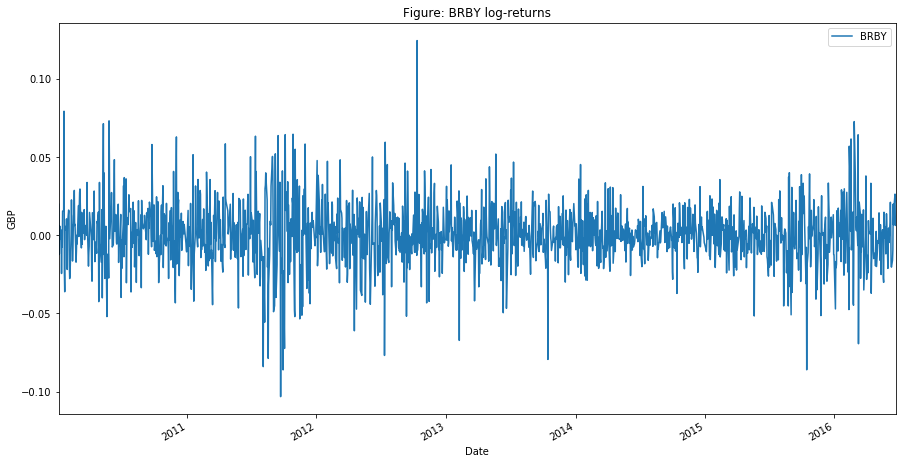

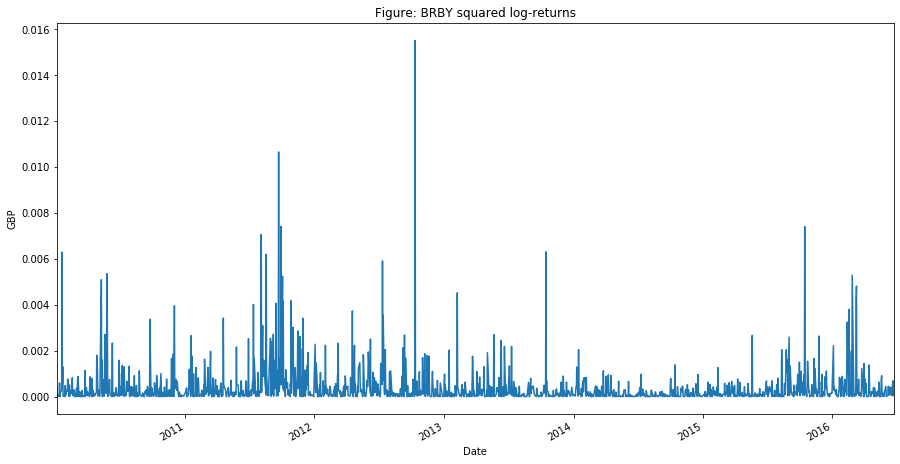

In [31]:
BRBY_log = stocks['BRBY'].copy()

#Log returns

plt.figure(figsize=(14, 5))
BRBY_log['Close'] = log_returns(BRBY_log)
BRBY_log = BRBY_log[(BRBY_log.index > start_date) & (BRBY_log.index < limit_date)]
BRBY_log['Close'].plot(figsize=(15,8), label='BRBY')
plt.xlabel('Date')
plt.ylabel('GBP')
plt.title('Figure: BRBY log-returns')
plt.legend();

#Log returns squared
BRBY_log_sq = BRBY_log.copy()
plt.figure(figsize=(14, 5))
BRBY_log_sq['Close'] = BRBY_log_sq['Close']**2
BRBY_log_sq['Close'].plot(figsize=(15,8), label='BRBY')
plt.xlabel('Date')
plt.ylabel('GBP')
plt.title('Figure: BRBY squared log-returns')

plt.show()

### Dicky-Fuller

In [32]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(BRBY_log['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -24.606107
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


### ARIMA on Closing Price

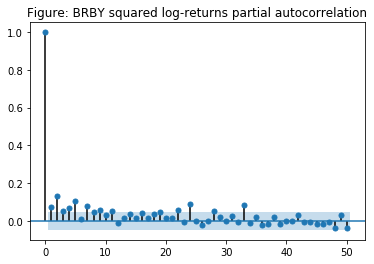

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(BRBY_log_sq['Close'], lags = 50)
plt.title('Figure: BRBY squared log-returns partial autocorrelation')
plt.show()

In [34]:
from statsmodels.tsa.arima_model import ARIMA

series = stocks['BRBY'].Close
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/home/michael/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/michael/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4344
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -19336.123
Method:                       css-mle   S.D. of innovations             20.745
Date:                Mon, 13 Jan 2020   AIC                          38686.246
Time:                        16:26:13   BIC                          38730.882
Sample:                             1   HQIC                         38702.002
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4631      0.291      1.593      0.111      -0.107       1.033
ar.L1.D.Close    -0.0078      0.015     -0.511      0.609      -0.038       0.022
ar.L2.D.Close    -0.0046      0.015     

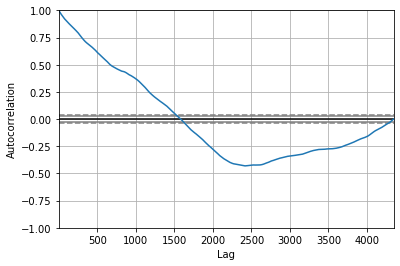

<Figure size 800x560 with 0 Axes>

In [35]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show() 

In [36]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

100%|██████████| 1478/1478 [01:43<00:00, 14.26it/s]


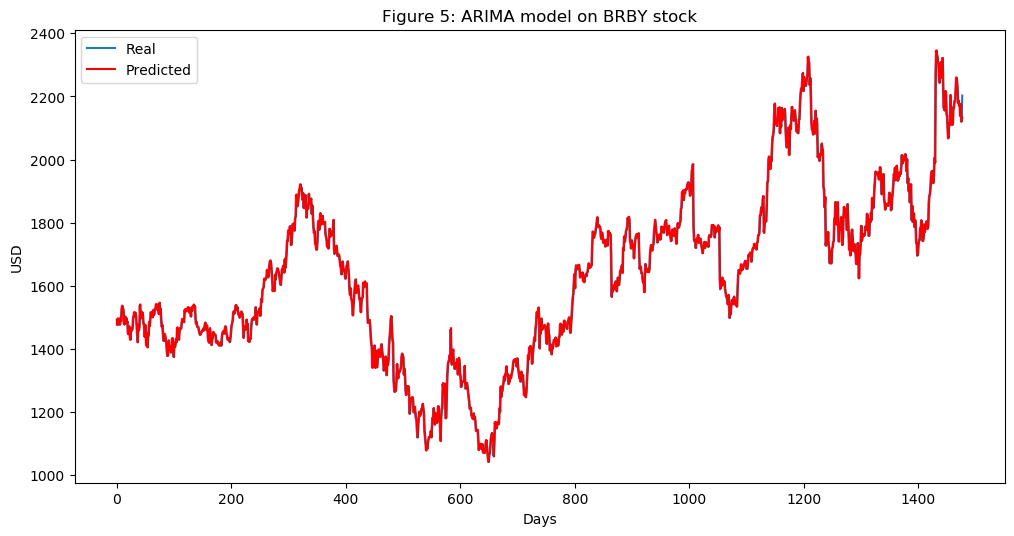

In [37]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on BRBY stock')
plt.legend()
plt.show()

### ARIMA on the log returns

In [38]:
print('BRBY log returns')
BRBY_log.describe()['Close']

BRBY log returns


count    1633.000000
mean        0.000502
std         0.019866
min        -0.103225
25%        -0.010133
50%         0.000601
75%         0.011603
max         0.124518
Name: Close, dtype: float64

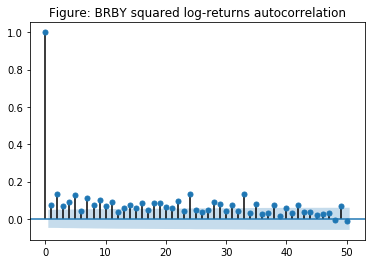

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(BRBY_log_sq['Close'], lags = 50)
plt.title('Figure: BRBY squared log-returns autocorrelation')
plt.show()

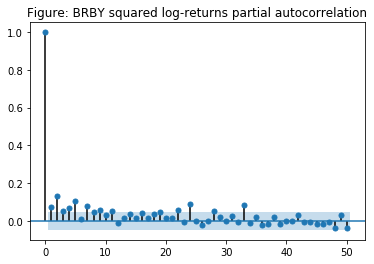

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(BRBY_log_sq['Close'], lags = 50)
plt.title('Figure: BRBY squared log-returns partial autocorrelation')
plt.show()

In [41]:
series = BRBY_log['Close']
model = ARIMA(series, order=(2, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1632
Model:                 ARIMA(2, 1, 0)   Log Likelihood                3826.749
Method:                       css-mle   S.D. of innovations              0.023
Date:                Mon, 13 Jan 2020   AIC                          -7645.497
Time:                        16:27:58   BIC                          -7623.907
Sample:                             1   HQIC                         -7637.488
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.404e-06      0.000      0.011      0.991      -0.001       0.001
ar.L1.D.Close    -0.5932      0.024    -25.104      0.000      -0.640      -0.547
ar.L2.D.Close    -0.2986      0.024    -

/home/michael/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/michael/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



### Plot residual erros

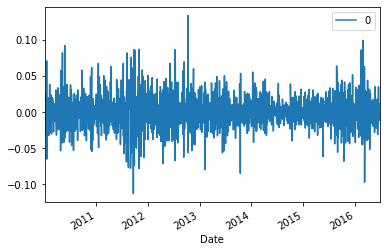

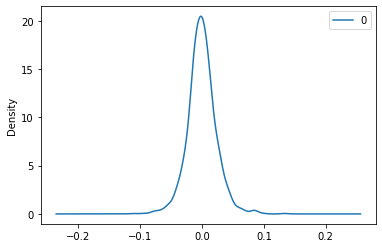

                 0
count  1632.000000
mean     -0.000015
std       0.023205
min      -0.112577
25%      -0.012985
50%      -0.000768
75%       0.012450
max       0.133253


In [42]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

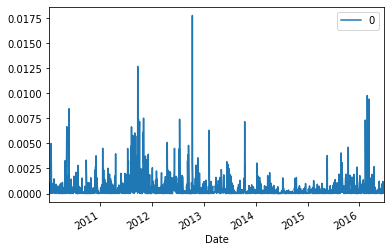

In [43]:
res_sq = residuals ** 2
res_sq.plot()

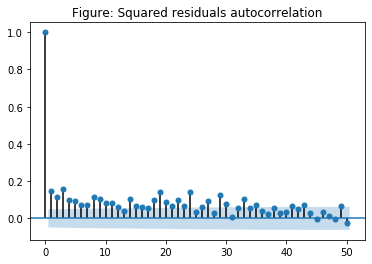

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals ** 2, lags = 50)
plt.title('Figure: Squared residuals autocorrelation')
plt.show()

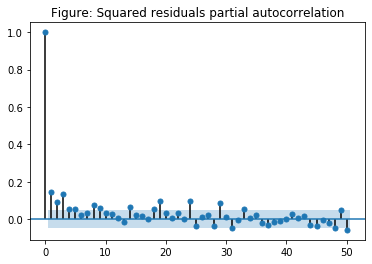

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(residuals ** 2, lags = 50)
plt.title('Figure: Squared residuals partial autocorrelation')
plt.show()

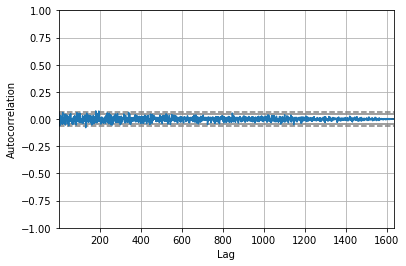

<Figure size 800x560 with 0 Axes>

In [46]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show() 

In [47]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

 25%|██▍       | 137/556 [00:13<00:41, 10.15it/s]/home/michael/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

100%|██████████| 556/556 [00:56<00:00,  9.85it/s]


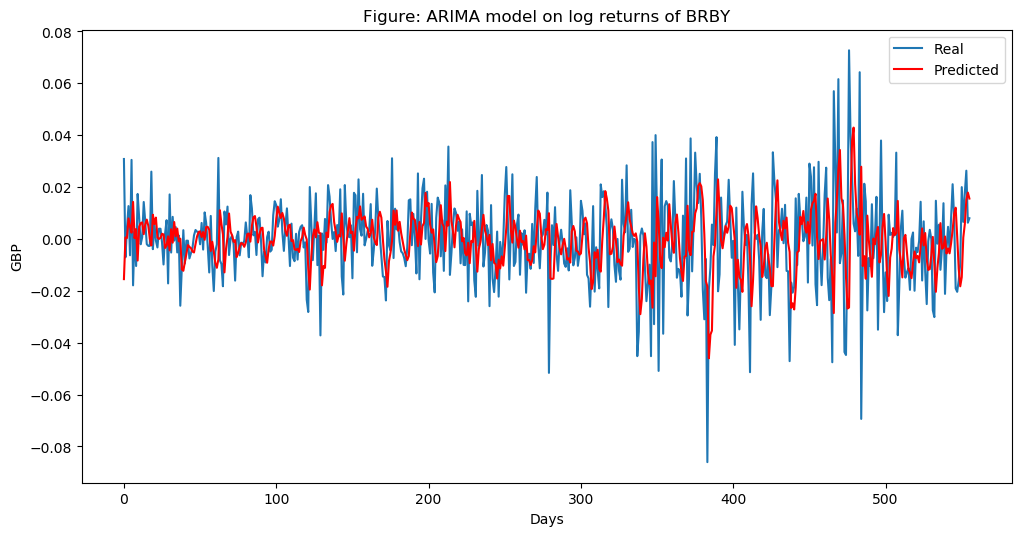

In [48]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('GBP')
plt.title('Figure: ARIMA model on log returns of BRBY')
plt.legend()
plt.show()

### Prediction for Burberry after June 23 2016

In [49]:
BRBY = stocks['PSON'].copy()

### Training on closing price before referendum

In [50]:
Close_before_ref = BRBY[(BRBY.index > start_date) & (BRBY.index < limit_date)].Close
model = ARIMA(Close_before_ref, order=(5, 1, 0))
model_fit = model.fit(disp=0)

/home/michael/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/michael/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



### Predicting closing price

In [51]:
test = BRBY[(BRBY.index >= limit_date)].Close
#predictions = model_fit.forecast(steps=len(test))[0]

In [52]:
train = Close_before_ref
history = [x for x in train]
predictions = list()
window = 1
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(window)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

100%|██████████| 822/822 [00:52<00:00, 15.76it/s]


In [53]:
predictions = np.reshape(predictions, (-1,1))

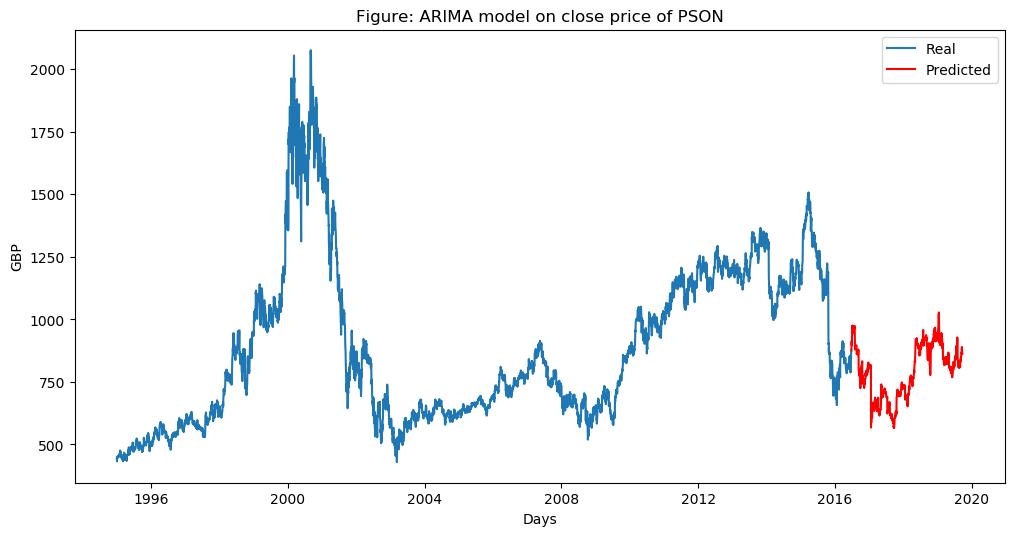

In [54]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(BRBY[BRBY.index < limit_date].index, BRBY[BRBY.index < limit_date].Close.values, label='Real')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('GBP')
plt.title('Figure: ARIMA model on close price of PSON')
plt.legend()
plt.show()

### Prediction for selected companies

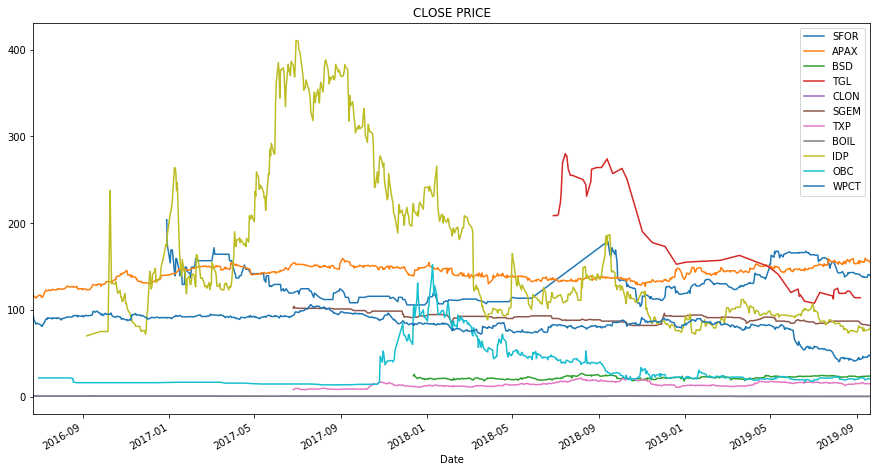

In [55]:
for symbol in ['SFOR','APAX','BSD','TGL','CLON','SGEM','TXP','BOIL','IDP','OBC','WPCT']:
    df = pd.read_csv('stock/'+symbol+'.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df[df.index >= limit_date]['Close'].plot(figsize=(15,8), title='CLOSE PRICE', label=symbol)
plt.legend();

### 5. Legislation

We considered that we would extract more information from the other databases in the given amount of time for the Data Open than in this database (Natural Language Processing being a very long process before obtaining insightful results). We decided not to use this database to answer our question.

In [56]:
LEGISLATION.sample(5)

act_name         date_of_act  \
454                Prevention of Terrorism Act 2005     11th March 2005   
821           Firearms (Amendment) (No. 2) Act 1997  27th November 1997   
287     Debt Relief (Developing Countries) Act 2010      8th April 2010   
851  Criminal Procedure and Investigations Act 1996       4th July 1996   
198                           Mobile Homes Act 2013     26th March 2013   

    amendment characters_in_act words_in_act  \
454     FALSE             75778        11566   
821      TRUE               319           51   
287     FALSE             14075         2138   
851     FALSE              1221          204   
198     FALSE             69918        10826   

                                           link_to_act  \
454  https://www.legislation.gov.uk/ukpga/2005/2/en...   
821  https://www.legislation.gov.uk/ukpga/1997/64/e...   
287  https://www.legislation.gov.uk/ukpga/2010/22/e...   
851  https://www.legislation.gov.uk/ukpga/1996/25/e...   
198  https://www.legislation.gov.uk/ukpga/2013/14/e...   

                                              act_text  
454  Be it enacted by the Queens most Excellent Maj...  
821  Be it enacted by the Queens most Excellent Maj...  
287  Be it enacted by the Queens most Excellent Maj...  
851  Be it enacted by the Queens most Excellent Maj...  
198  Be it enacted by the Queens most Excellent Maj...

### 6. Job listings

In [57]:
ONET_LEGEND.sample(5)

O*NET 2010 Code                 O*NET 2010 Title  \
38       11-9039.01   Distance Learning Coordinators   
100      13-2011.01                      Accountants   
346      25-1054.00  Physics Teachers, Postsecondary   
198      17-2199.09            Nanosystems Engineers   
236      19-1011.00                Animal Scientists   

                                O*NET 2010 Description  
38   Coordinate day-to-day operations of distance l...  
100  Analyze financial information and prepare fina...  
346  Teach courses pertaining to the laws of matter...  
198  Design, develop, or supervise the production o...  
236  Conduct research in the genetics, nutrition, r...

In [58]:
JOB_LISTINGS = JOB_LISTINGS.merge(
    ONET_LEGEND, left_on="onet_occupation_code", right_on="O*NET 2010 Code", how="left"
)
JOB_LISTINGS.sample(5)

title   company_name       city  \
1549432              Trainee Optical Consultant          Boots    Fareham   
1486072                Trainee Pharmacy Advisor          Boots      Otley   
2031925    Staff Member - Full Time - Kirkstall  McDonald's UK      Leeds   
2658828  Booker - Store Manager - Home Counties   Booker Group        NaN   
1123223                      Customer Assistant          Tesco  Cambridge   

          region   zip                   created              last_checked  \
1549432  England  PO16 2015-08-26 05:08:03+00:00 2016-01-25 06:39:35+00:00   
1486072  England   NaN 2019-03-26 13:22:00+00:00 2019-03-26 13:22:00+00:00   
2031925  England   NaN 2019-04-29 06:47:00+00:00 2019-05-03 10:44:00+00:00   
2658828      NaN   NaN 2018-05-13 19:30:00+00:00 2018-05-13 19:30:00+00:00   
1123223  England   NaN 2016-06-29 20:05:51+00:00 2016-07-01 03:48:33+00:00   

        last_updated               delete_date onet_occupation_code  \
1549432          NaT 2016-01-27 11:21:49+00:00           41-2031.00   
1486072          NaT 2019-03-26 13:39:00+00:00           29-2052.00   
2031925          NaT 2019-05-04 13:25:00+00:00           35-3021.00   
2658828          NaT 2018-05-16 04:21:00+00:00           11-1021.00   
1123223          NaT 2016-07-02 04:20:06+00:00           43-4051.00   

         SOC_occupation_code  \
1549432                 7115   
1486072                 7114   
2031925                 9998   
2658828                 1254   
1123223                 7211   

                                                       url  \
1549432  https://krb-sjobs.brassring.com/TGWebHost/jobd...   
1486072  https://krb-sjobs.brassring.com/TGnewUI/Search...   
2031925  https://careers.peopleclick.com/careerscp/clie...   
2658828  https://ig24.i-grasp.com/fe/tpl_makro01.asp?s=...   
1123223  http://www.tesco-careers.com/JobDetails/137232...   

        stock_exchange_country stock_exchange_name stock_ticker  \
1549432                     US                 NYS          ABT   
1486072                     US                 NYS          ABT   
2031925                     US                 NYS          MCD   
2658828                     GB                 LON         TSCO   
1123223                     GB                 LON         TSCO   

        ticker_end_date ticker_start_date O*NET 2010 Code  \
1549432             NaT        1972-01-21      41-2031.00   
1486072             NaT        1972-01-21      29-2052.00   
2031925             NaT        1972-01-21      35-3021.00   
2658828             NaT        2018-03-05      11-1021.00   
1123223             NaT               NaT      43-4051.00   

                                          O*NET 2010 Title  \
1549432                                Retail Salespersons   
1486072                               Pharmacy Technicians   
2031925  Combined Food Preparation and Serving Workers,...   
2658828                    General and Operations Managers   
1123223                   Customer Service Representatives   

                                    O*NET 2010 Description  
1549432  Sell merchandise, such as furniture, motor veh...  
1486072  Prepare medications under the direction of a p...  
2031925  Perform duties which combine preparing and ser...  
2658828  Plan, direct, or coordinate the operations of ...  
1123223  Interact with customers to provide information...

In [59]:
JOB_LISTINGS['O*NET 2010 Code'].isnull().mean()

0.08447356539991252

In [60]:
JOB_LISTINGS.columns

Index(['title', 'company_name', 'city', 'region', 'zip', 'created',
       'last_checked', 'last_updated', 'delete_date', 'onet_occupation_code',
       'SOC_occupation_code', 'url', 'stock_exchange_country',
       'stock_exchange_name', 'stock_ticker', 'ticker_end_date',
       'ticker_start_date', 'O*NET 2010 Code', 'O*NET 2010 Title',
       'O*NET 2010 Description'],
      dtype='object')

In [61]:
JOB_LISTINGS = JOB_LISTINGS[JOB_LISTINGS["onet_occupation_code"].notnull()]
JOB_LISTINGS = JOB_LISTINGS.drop(columns=["O*NET 2010 Code"])
JOB_LISTINGS["major"] = JOB_LISTINGS["onet_occupation_code"].apply(lambda x: x.split('-')[0])

JOB_LISTINGS["dt_created"] = JOB_LISTINGS["created"].apply(lambda x: x.timestamp() if not pd.isnull(x) else x)
JOB_LISTINGS["dt_deleted"] = JOB_LISTINGS["delete_date"].apply(lambda x: x.timestamp() if not pd.isnull(x) else x)

min_created = min(JOB_LISTINGS["dt_created"].values)
min_deleted = min(JOB_LISTINGS["dt_deleted"].values)
min_dt = min(min_created, min_deleted)

max_created = max(JOB_LISTINGS["dt_created"].values)
max_deleted = max(JOB_LISTINGS["dt_deleted"].values)
max_dt = max(max_created, max_deleted)

min_dt, max_dt

(1238563860.0, 1567295400.0)

In [62]:
month_seconds = 60*60*24*365.25 / 12

In [63]:
min_dt_month = min_dt // month_seconds
max_dt_month = max_dt // month_seconds
min_dt_month, max_dt_month

(470.0, 595.0)

In [64]:
JOB_LISTINGS["month_index_created"] = JOB_LISTINGS["dt_created"] // month_seconds - min_dt_month
JOB_LISTINGS["month_index_deleted"] = JOB_LISTINGS["dt_deleted"] // month_seconds - min_dt_month

grouped = JOB_LISTINGS[["month_index_created", "major", "title"]].groupby(["month_index_created", "major"]).count()
grouped

title
month_index_created major       
0.0                 13         2
4.0                 41         1
5.0                 41         1
6.0                 17         1
7.0                 13         1
...                          ...
125.0               49       386
                    51       468
                    53       738
                    55         2
                    99      7164

[2638 rows x 1 columns]

In [65]:
grouped.index.levels[1]

Index(['11', '13', '15', '17', '19', '21', '23', '25', '27', '29', '31', '33',
       '35', '37', '39', '41', '43', '45', '47', '49', '51', '53', '55', '99'],
      dtype='object', name='major')

In [66]:
data = {}
for major in grouped.index.levels[1]:
    a = grouped[grouped.index.get_level_values(1) == major]
    Y = a.values
    X = list(a.index.get_level_values(0))
    data[major] = (X, Y)

del data['99']
# list(data.keys())

In [67]:
referendum = np.datetime64(datetime(2016, 6, 23))
referendum
# referendum.timestamp() // month_seconds - min_dt_month

numpy.datetime64('2016-06-23T00:00:00.000000')

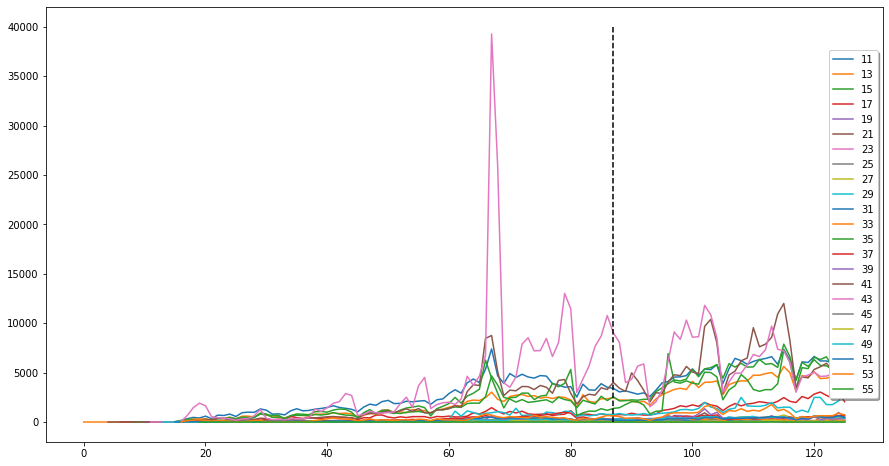

In [68]:
fig, ax = plt.subplots(figsize=(15, 8))
for major in data.keys():
    ax.plot(*data[major], label=major)
ax.plot([87, 87], [0, 40000], "k--")

legend = ax.legend(loc='right', shadow=True)

In [69]:
def get_timestamp(month_index):
    return np.datetime64(datetime.fromtimestamp((month_index + min_dt_month) * month_seconds))

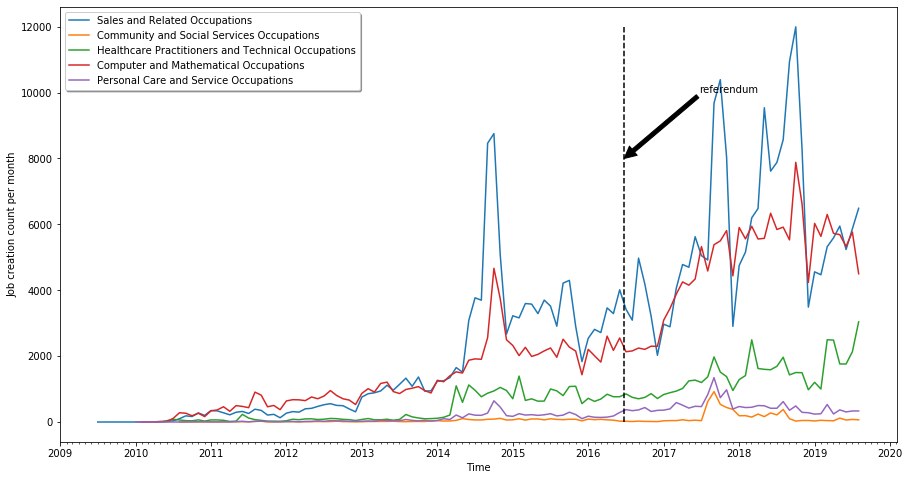

In [70]:
best_5 = [] #(sorted)
worst_5 = []
mean = {}

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month

for major, XY in data.items():
    for i in range(1, len(XY[0])):
        dt = get_timestamp(XY[0][i])
        if dt > referendum:
            break
        assert i != len(XY[0]) - 1, i
    mean[major] = (np.mean(XY[1][:i]), np.mean(XY[1][i:]), (np.mean(XY[1][i:]) - np.mean(XY[1][:i]))/np.mean(XY[1]))
    best_5.append((major, (mean[major][2])))
    best_5 = sorted(best_5, key=lambda x: x[1])
    best_5 = best_5[max(len(best_5)-5, 0):]
    worst_5.append((major, mean[major][2]))
    worst_5 = sorted(worst_5, key=lambda x: x[1])
    worst_5 = worst_5[:5]

legend = {
    '15': "Computer and Mathematical Occupations",
    '21': "Community and Social Services Occupations",
    '29': "Healthcare Practitioners and Technical Occupations",
    '39': "Personal Care and Service Occupations",
    '41': "Sales and Related Occupations"
}
            
fig, ax = plt.subplots(figsize=(15, 8))
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
for major in [x[0] for x in best_5]:
    X = [get_timestamp(month_index) for month_index in data[major][0]]
    ax.plot(X, data[major][1], label=legend[major])
ax.plot([referendum, referendum], [0, 12000], "k--")
ax.annotate('referendum', xy=(referendum, 8000), xytext=(np.datetime64(datetime(2017, 6, 23)), 10000),
            arrowprops=dict(facecolor='black'))
ax.set_xlabel("Time")
ax.set_ylabel("Job creation count per month")
legend = ax.legend(loc='upper left', shadow=True)
best_5, worst_5

fig.savefig("best_increases in job creation.jpg")

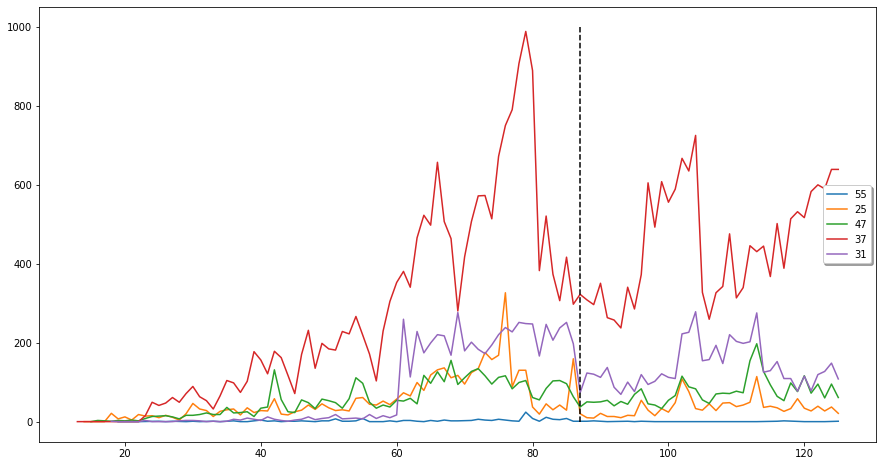

In [71]:
fig, ax = plt.subplots(figsize=(15, 8))
for major in [x[0] for x in worst_5]:
    ax.plot(*data[major], label=major)
ax.plot([87, 87], [0, 1000], "k--")
legend = ax.legend(loc='right', shadow=True)

In [72]:
JOB_LISTINGS["major_category"] = JOB_LISTINGS["onet_occupation_code"].apply(lambda x: x.split('-')[0][:-1])
JOB_LISTINGS = JOB_LISTINGS[JOB_LISTINGS["major_category"] != '9']
grouped_agg = JOB_LISTINGS[["month_index_created", "major_category", "title"]].groupby(["month_index_created", "major_category"]).count()
grouped_agg

title
month_index_created major_category       
0.0                 1                   2
4.0                 4                   1
5.0                 4                   1
6.0                 1                   1
7.0                 1                   1
...                                   ...
125.0               1               15752
                    2                3648
                    3                7983
                    4               12498
                    5                1208

[582 rows x 1 columns]

In [73]:
legend_major_categories = {
    '1': "Executives",
    '2': "Liberals",
    '3': "Healthcare and Food",
    '4': "Unqualified Worker I",
    '5': "Unqualified Worker II"
}

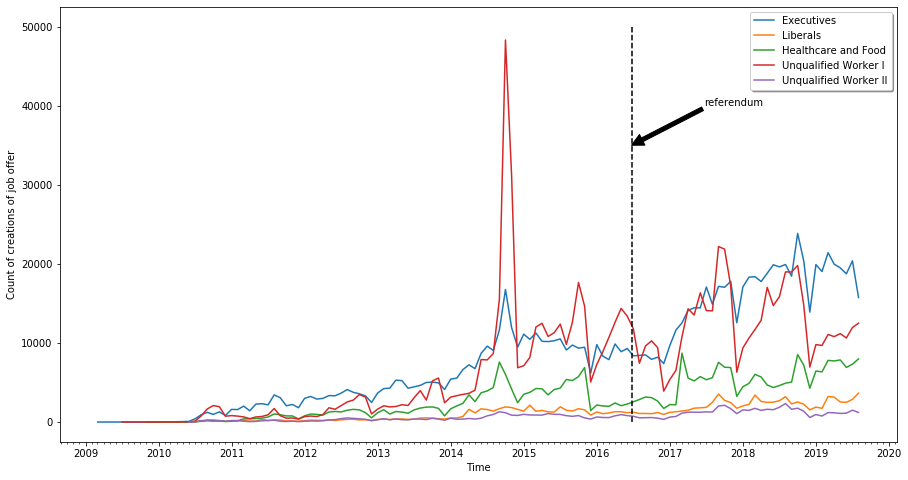

In [74]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

data_agg = {}
for major_category in grouped_agg.index.levels[1]:
    a = grouped_agg[grouped_agg.index.get_level_values(1) == major_category]
    Y = a.values
    X = [get_timestamp(month_index) for month_index in a.index.get_level_values(0)]
    data_agg[major_category] = (X, Y)

fig, ax = plt.subplots(figsize=(15, 8))
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
for major_category in data_agg.keys():
    ax.plot(*data_agg[major_category], label=legend_major_categories[major_category])
ax.plot([referendum, referendum], [0, 50000], "k--")
ax.annotate('referendum', xy=(referendum, 35000), xytext=(np.datetime64(datetime(2017, 6, 23)), 40000),
            arrowprops=dict(facecolor='black'))

legend = ax.legend(loc='upper right', shadow=True)
ax.set_ylabel("Count of creations of job offer")
ax.set_xlabel("Time")
plt.savefig("job_creation.jpg")

In [75]:
day_seconds = 60 * 60 * 24

min_day = min(JOB_LISTINGS["dt_created"].values)
max_day = max(JOB_LISTINGS["dt_deleted"].values)
min_dt_day = min_dt // day_seconds
max_dt_day = max_dt // day_seconds
min_dt_day, max_dt_day

(14335.0, 18139.0)

In [76]:
JOB_LISTINGS["exist_day_count"] = (JOB_LISTINGS["delete_date"] - JOB_LISTINGS["created"]).dt.days
#JOB_LISTINGS["day_index_created"] = JOB_LISTINGS["dt_created"] // day_seconds - min_dt_day

grouped_exist_agg = JOB_LISTINGS[["exist_day_count", "major_category", "month_index_created"]].groupby(["month_index_created", "major_category"]).mean()
grouped_exist_agg

exist_day_count
month_index_created major_category                 
0.0                 1                    743.000000
4.0                 4                    522.000000
5.0                 4                    699.000000
6.0                 1                    479.000000
7.0                 1                    412.000000
...                                             ...
125.0               1                      7.558330
                    2                      9.981575
                    3                      8.802134
                    4                      7.810365
                    5                      7.465430

[582 rows x 1 columns]

In [77]:
data_day_exist = {}
for major_category in grouped_exist_agg.index.levels[1]:
    a = grouped_exist_agg[grouped_exist_agg.index.get_level_values(1) == major_category]
    Y = a.values
    X = [np.datetime64(datetime.fromtimestamp((month_index + min_dt_month) * month_seconds)) for month_index in a.index.get_level_values(0)]
    data_day_exist[major_category] = (X, Y)


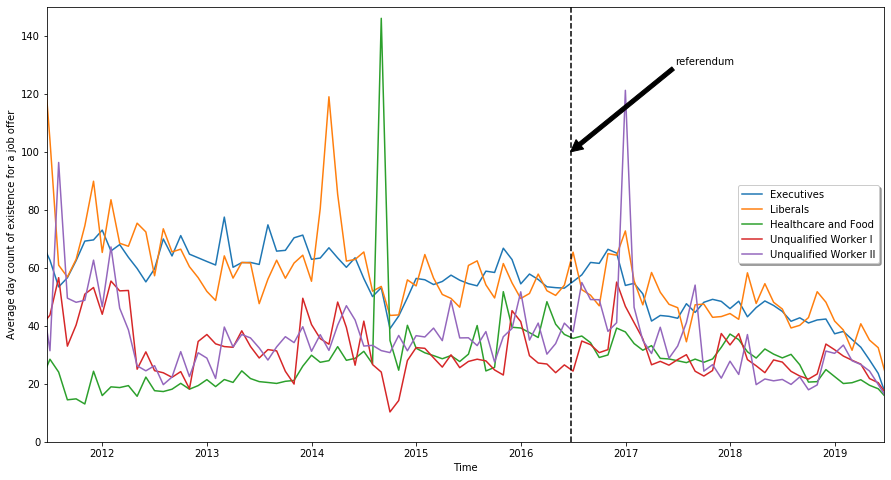

In [78]:
fig, ax = plt.subplots(figsize=(15, 8))
for major in data_day_exist.keys():
    ax.plot(*data_day_exist[major], label=legend_major_categories[major])
ax.plot([referendum, referendum], [0, 150], "k--")
ax.annotate('referendum', xy=(referendum, 100), xytext=(np.datetime64(datetime(2017, 6, 23)), 130),
            arrowprops=dict(facecolor='black'))
legend = ax.legend(loc='right', shadow=True)
ax.set_xlabel("Time")
ax.set_ylabel("Average day count of existence for a job offer")
ax.set_xlim(np.datetime64(datetime(2011, 6, 23)), np.datetime64(datetime(2019, 6, 23)))
ax.set_ylim(0, 150)
plt.savefig("existence day count for a job offer.jpg")

In [79]:
symbols = np.load("symbols_sample.npy")
symbols

array(['BRBY', 'AHT', 'SFOR', 'APAX', 'BSD', 'TGL', 'CLON', 'ADM', 'PSON',
       'SGEM', 'TXP', 'BOIL', 'IDP', 'OBC', 'WPCT'], dtype='<U4')

In [80]:
set(JOB_LISTINGS["stock_ticker"]).intersection(set(symbols))
# data_fin = {}
# for major in grouped.index.levels[1]:
#     a = grouped[grouped.index.get_level_values(1) == major]
#     Y = a.values
#     X = list(a.index.get_level_values(0))
#     data[major] = (X, Y)

# list(data_fin.keys())

{'ADM', 'PSON'}

In [81]:
grouped = JOB_LISTINGS[JOB_LISTINGS["stock_ticker"] == "PSON"][["month_index_created", "title"]].groupby(["month_index_created"]).count()
grouped

title
month_index_created       
46.0                    47
47.0                    44
48.0                    26
49.0                    43
50.0                    27
...                    ...
121.0                   87
122.0                   61
123.0                   58
124.0                   66
125.0                   66

[80 rows x 1 columns]

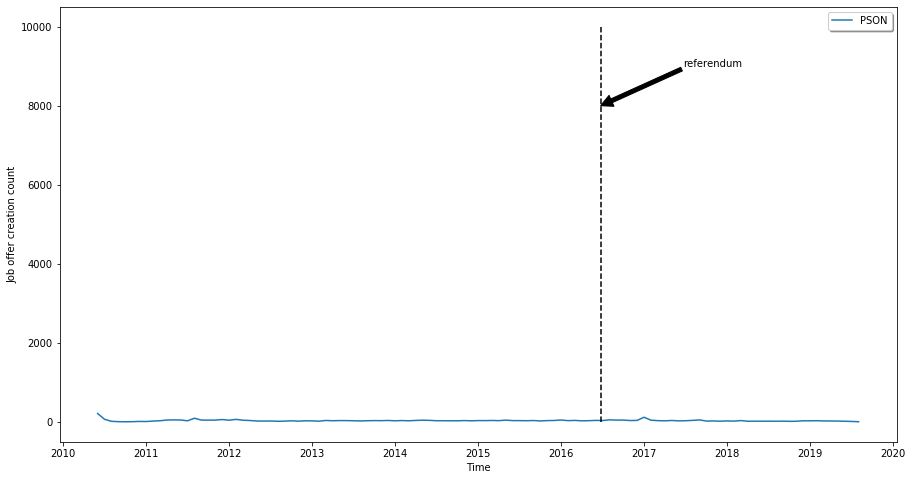

In [82]:
Y = a.values
X = list(a.index.get_level_values(0))
data = [X, Y]

data[0] = [get_timestamp(month_index) for month_index in data[0]]
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(*data, label="PSON")
ax.plot([referendum, referendum], [0, 10000], "k--")
ax.annotate('referendum', xy=(referendum, 8000), xytext=(np.datetime64(datetime(2017, 6, 23)), 9000),
            arrowprops=dict(facecolor='black'))
legend = ax.legend(loc='upper right', shadow=True)
ax.set_xlabel("Time")
ax.set_ylabel("Job offer creation count")
fig.savefig("PSON.jpg")

### Employment

In [83]:
EMPLOYMENT.sample(5)

year  soc_occupation_code  soc_major  soc_minor  soc_unit  \
3550   2011                  923          9       23.0       NaN   
28055  2018                 4131          4       13.0       1.0   
7703   2013                 1181          1       18.0       1.0   
23247  2017                 2314          2       31.0       4.0   
14653  2014                 8234          8       23.0       4.0   

                                             description     sex  \
3550                     Elementary Cleaning Occupations    male   
28055                      Records clerks and assistants  female   
7703   Health services and public health managers and...  female   
23247         Secondary education teaching professionals  female   
14653                          Rail transport operatives  female   

            emp_type fp_time    value  
3550   self-employed    full  10372.0  
28055  self-employed    part      NaN  
7703   self-employed    part      NaN  
23247  self-employed    part      NaN  
14653  self-employed    part      NaN

In [84]:
SOC_LEGEND.sample(5)

Major Group  Sub-Major Group  Minor Group  Unit   Group  \
130          2.0             24.0        244.0        2444.0   
260          4.0             42.0        421.0        4215.0   
174          3.0             33.0        331.0        3311.0   
475          9.0             92.0        923.0        9239.0   
203          3.0             35.0        353.0           NaN   

                                           Group Title  
130                                             Clergy  
260          Personal assistants and other secretaries  
174                               NCOs and other ranks  
475             Elementary cleaning occupations n.e.c.  
203  Business, Finance and Related Associate Profes...